<a href="https://colab.research.google.com/github/AlexMa123/BIU_ComplexSystem_private/blob/main/Lecture%201%20-%20Cellular%20Automaton.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Pacakge installation; For colab users, you need to run this cell to install the packages every time you restart the runtime
# but for local users, you can comment this cell out after you installed the packages
!pip install cellpylib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for cellpylib: filename=cellpylib-2.3.1-py3-none-any.whl size=37203 sha256=ffa9ba33f166baeb5f976e0f05a7a8bfc35b60a71bae4f6f8eff133e06fc2b2c
  Stored in directory: /root/.cache/pip/wheels/d5/73/32/622dcd98d07d168915cd53df6333cdba6a088941638ee2a772
Successfully built cellpylib


# Introduction to Cellular Automata (CA) -- What is complex ?

The complex system is a relatively new and broadly interdisciplinary field that deals with systems composed of many interacting units. There is no precise technical definition of a "complex system."Unfortunately, modeling a complex system is very hard.

Just like what Mark Newman wrote in his paper "Complex Systems: A Survey": `Complex systems theory is divided between two basic approaches.` `The first involves the creation and study of simplified mathematical models` that, while they may not mimic the behavior of real systems exactly, `try to abstract the most important qualitative elements into a solvable framework from which we can gain scientific insight`. The tools used in such studies include dynamical systems theory, game theory, information theory, cellular automata, networks, computational complexity theory, and numerical methods.

`The second approach is to create more comprehensive and realistic models, usually in the form of computer simulations,` which represent the interacting parts of a complex system, often down to minute details, and then to watch and measure the emergent behaviors that appear. The tools of this approach include
techniques such as Monte Carlo simulation and, particularly, agent-based simulation, around which a community of computer scientists and software developers has grown up to create software tools for sophisticated computational research in complex systems.

In this lecture, we will just focus on 1d cellular automata to give you a feeling about complex.

## What is a cellular automata ?
### Cell Lattice

Cellular Automata are mathematical models in which space and time are discrete. The proceeds in steps and space are represented as a lattice or array of cells (see the figure below). Each cell is in a particular state that may change over time. The state of all cells forms the global state or configuration of the CA.
![Cell Lattice](https://natureofcode.com/book/imgs/chapter07/ch07_07.png)

The state of the cell at position $i$ and time $t$ is denoted as $a_i(t)$. The state space of the cells is usually discrete and finite. The state of each cell can thus take k (for the figure I showed above, k=2) discrete values:
$$a_i(t) \in \{0, 1, \dots, k-1\}$$

How many possible states do we have when we consider the nearest neighbors ?

$2^3$: 3 cells, and each can be 2 states.

### Local Rules
The state of each cell is updated according to a set of local rules, which determine the next state of the cell $a_i(t+1)$ given the current state of the cell $a_i(t)$ as well as the states of the neighboring cells, such as $a_{i-1}(t)$ and $a_{i+1}(t)$. The rules are local because the next state of a cell only depends on the state of the cells in its neighborhood.
![Rule 90](https://natureofcode.com/book/imgs/chapter07/ch07_14.png)

Usually, the neighborhood of a cell only includes the nearest neighbors in a neighborhood radius r. For 1d case, only consists $2r + 1$ cells

### Rule Number

let's take the case (r=1, k=2) as the example. There are $2^{2^3}=256$ possible rules to define the evolution of a cell automata. Since r=2, we can regard the rules shown in the figure above as a number in binary system: 01011010.

In [ ]:
int('01011010', 2)

90

> $0 * 2^0 + 1 * 2 ^ 1 + 0 * 2^2 + 1 * 2 ^ 3 + 1 * 2 ^ 4 + 0 * 2 ^ 5 + 1 * 2 ^ 6 = 90$

In [ ]:
bin(90) # '0b' at the beginning means it's a binary number

'0b1011010'

So the rule number of the example will be 90.

## Simulation CA in python

In [ ]:
# Cellpylib is a python package for simulating and visualizing cellular automata, also can measures the complexity of the cellular automata
import cellpylib as cpl
import matplotlib.pyplot as plt

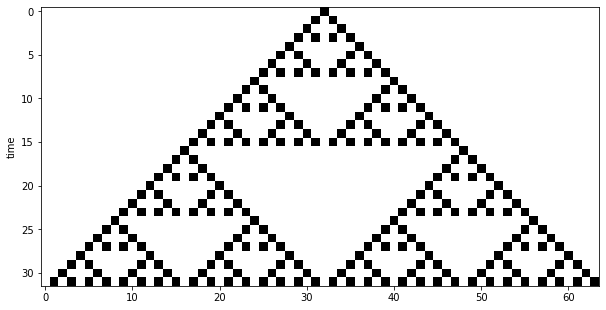

In [ ]:
# Initialize the cellular automaton with a single cell in the middle of the first row
cellular_automaton = cpl.init_simple(64)


# Simulate the cellular automaton for 100 steps
# The parameter 'memorize' is used to accelerate the simulation, even though it takes more memory
cellular_automaton = cpl.evolve(cellular_automaton, 
                                timesteps=32, 
                                memoize=True, 
                                apply_rule=lambda n, c, t: cpl.nks_rule(n, 90))

plt.figure(figsize=(10, 10))
cpl.plot(cellular_automaton)

It seems like rule 90 gives us some triangles. What if we make the system evolute longer?



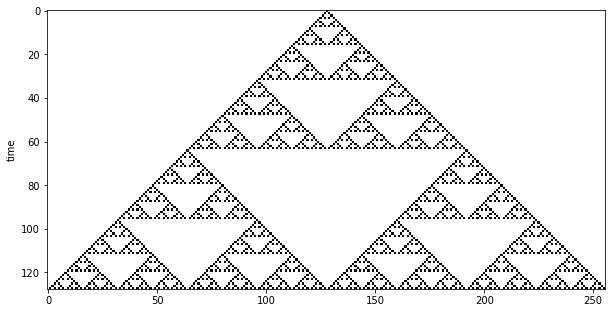

In [ ]:
# Initialize the cellular automaton with a single cell in the middle of the first row
cellular_automaton = cpl.init_simple(256)

# Simulate the cellular automaton for 100 steps
# The parameter 'memorize' is used to accelerate the simulation, even though it takes more memory
cellular_automaton = cpl.evolve(cellular_automaton, 
                                timesteps=128, 
                                memoize=True, 
                                apply_rule=lambda n, c, t: cpl.nks_rule(n, 90))

plt.figure(figsize=(10, 10))
cpl.plot(cellular_automaton)

We get exactly the same pattern! This means this pattern is scale-invariance.

What about the other rules?

### Rule 0 - A trival example

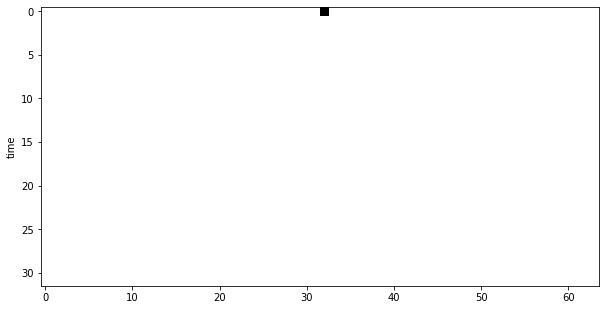

In [ ]:
cellular_automaton = cpl.init_simple(64)

cellular_automaton = cpl.evolve(cellular_automaton, 
                                timesteps=32, 
                                memoize=True, 
                                apply_rule=lambda n, c, t: cpl.nks_rule(n, 0))

plt.figure(figsize=(10, 10))
cpl.plot(cellular_automaton)

### Rule 94 - Simple Patterns

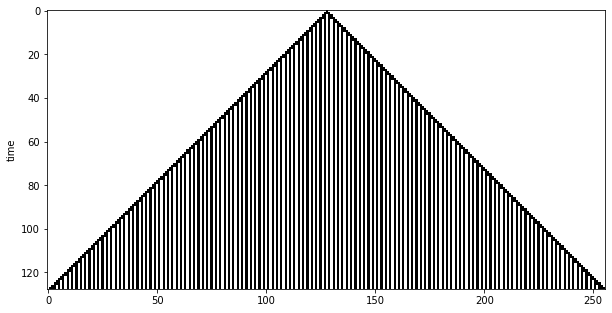

In [ ]:
cellular_automaton = cpl.init_simple(256)

cellular_automaton = cpl.evolve(cellular_automaton, 
                                timesteps=128, 
                                memoize=True, 
                                apply_rule=lambda n, c, t: cpl.nks_rule(n, 94))

plt.figure(figsize=(10, 10))
cpl.plot(cellular_automaton)

### Rule 30 - Chaos

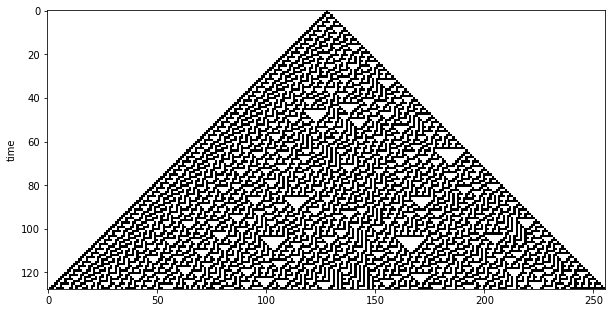

In [ ]:
cellular_automaton = cpl.init_simple(256)

cellular_automaton = cpl.evolve(cellular_automaton, 
                                timesteps=128, 
                                memoize=True, 
                                apply_rule=lambda n, c, t: cpl.nks_rule(n, 30))

plt.figure(figsize=(10, 10))
cpl.plot(cellular_automaton)

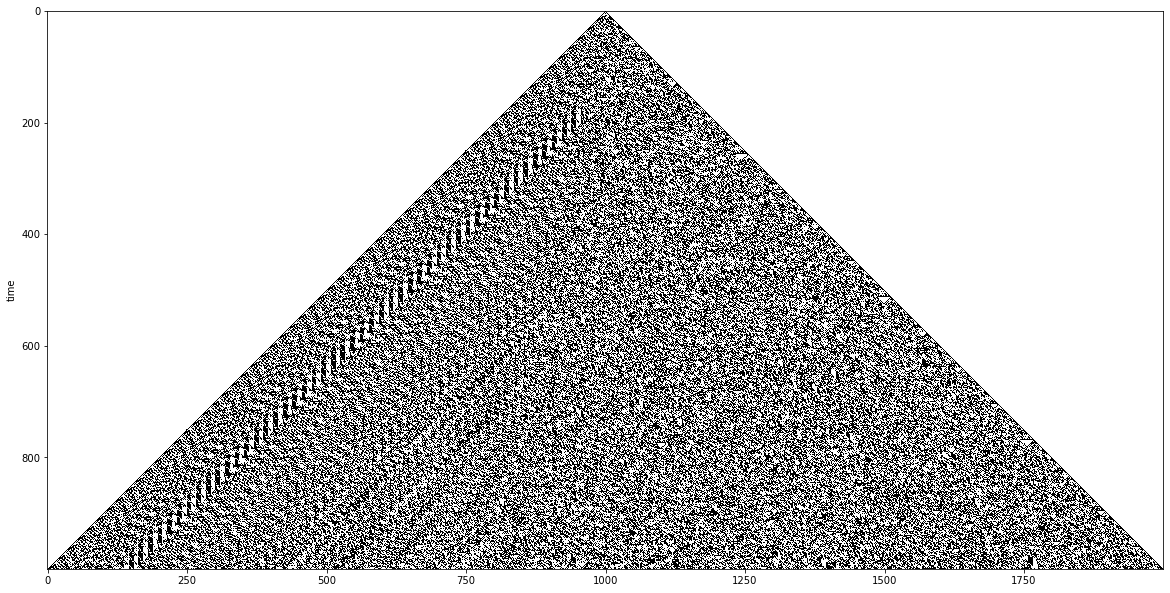

In [ ]:
cellular_automaton = cpl.init_simple(2000)

cellular_automaton = cpl.evolve(cellular_automaton, 
                                timesteps=1000, 
                                memoize=True, 
                                apply_rule=lambda n, c, t: cpl.nks_rule(n, 30))

plt.figure(figsize=(20, 15))
cpl.plot(cellular_automaton)

Rule 30 was introduced by Stephen Wolfram in 1983. And this rule has also been used as a random number generator in Mathematica. Stephen Wolfram proposed using its center column as a pseudorandom number generator (PRNG); it passes many standard tests for randomness, and Wolfram previously used this rule in the Mathematica product for creating random integers.
![Conus textile](https://upload.wikimedia.org/wikipedia/commons/thumb/7/7d/Textile_cone.JPG/1200px-Textile_cone.JPG)

### Rule 110 - A state between order(simple) and chaos

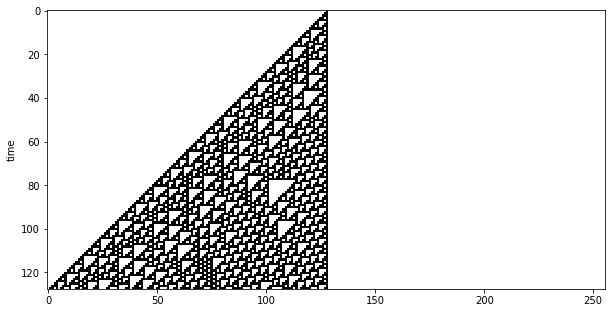

In [ ]:
cellular_automaton = cpl.init_simple(256)

cellular_automaton = cpl.evolve(cellular_automaton, 
                                timesteps=128, 
                                memoize=True, 
                                apply_rule=lambda n, c, t: cpl.nks_rule(n, 110))

plt.figure(figsize=(10, 10))
cpl.plot(cellular_automaton)

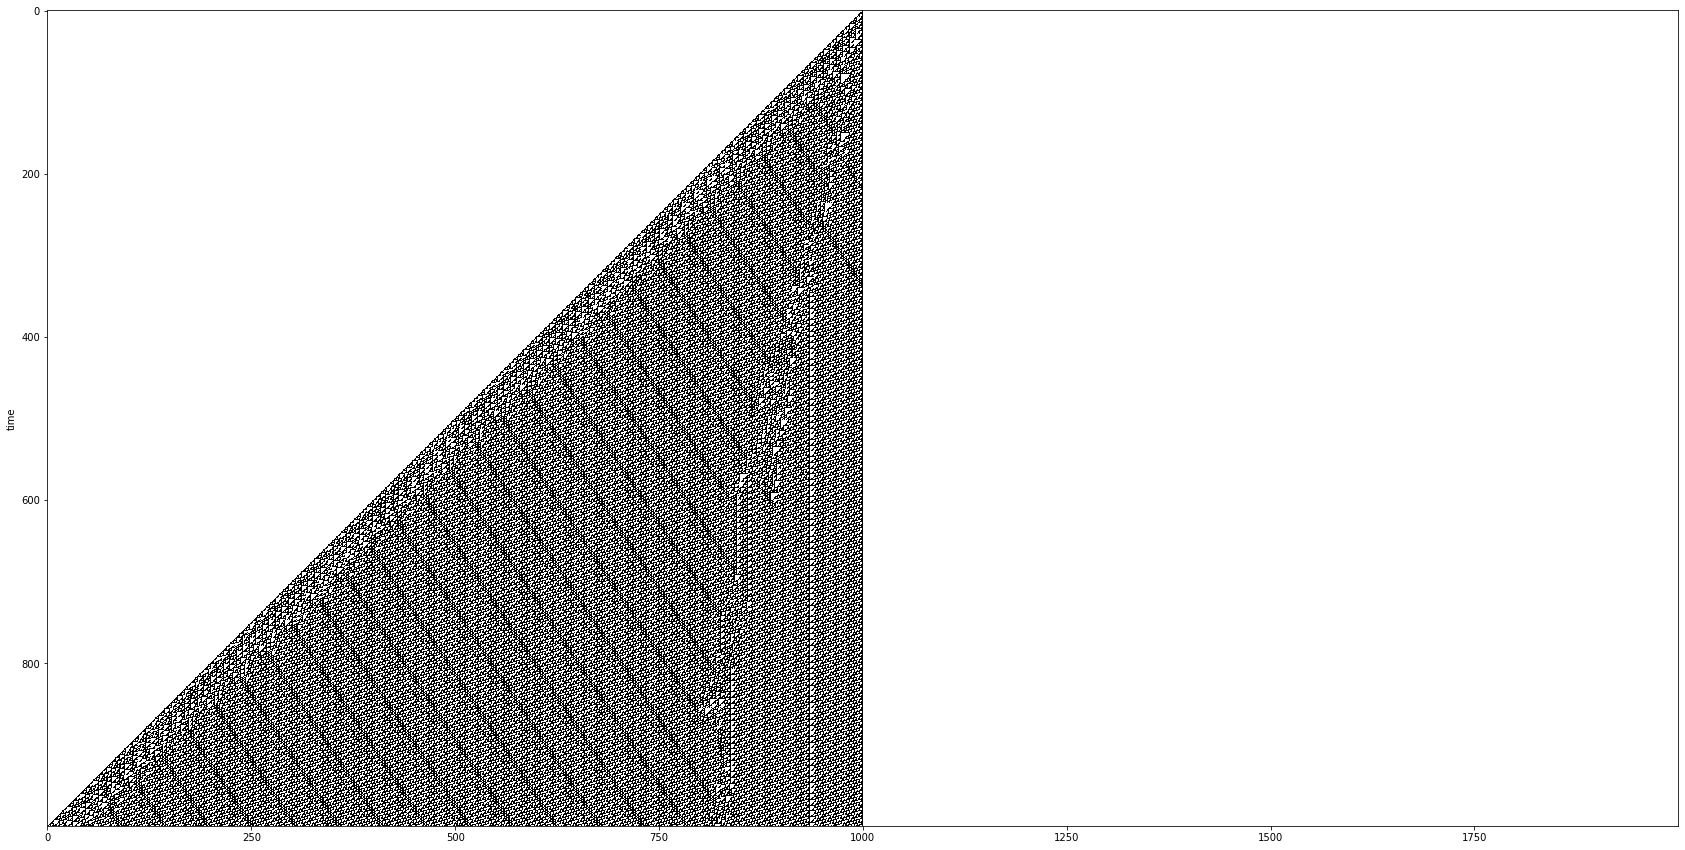

In [ ]:
cellular_automaton = cpl.init_simple(2000)

cellular_automaton = cpl.evolve(cellular_automaton, 
                                timesteps=1000, 
                                memoize=True, 
                                apply_rule=lambda n, c, t: cpl.nks_rule(n, 110))

plt.figure(figsize=(30, 15))
cpl.plot(cellular_automaton)

## The Four Classes of Cellular Automata

Stephon Wolfram summarized CAs into 4 classes (Cellular automata as models of complexity, https://www.nature.com/articles/311419a0):

* ***Class I*** - Almost all initial conditions lead to exactly the same uniform final state. The system will evolve to simple 'limit points' in phase space, said to have point attractors.

* ***Class II*** - There are many different possible final states, but all of them consist just of a certain set of simple structures that either remain the same forever, or repeat every few steps. The system evolve to a 'limit circle', said to have periodic attractors.

* ***Class III*** - The behavior is more complicated, and seems in many respects random, although triangles and other small-scale structures are essentially always at some level seen. The system have strange or chaotic attractors.

* ***Class IV*** - The system is between class 2 and class 3. It involves a mixture of order and randomness: localized structures are produced which on their own are failry simple, but these structures move around and interact with each other in very complicated ways.

Which classes will the real complex system stay ?

Here is an example of heartbeat time seires

![heartbeat](https://raw.githubusercontent.com/AlexMa123/BIU-ComplexSystem/main/figures/heartbeats.jpg)

which one do you think is the heartbeat from a healthy person?

## Rule table and Langton's $\lambda$ parameter and the edge of chaos

After Wolfram gives the four classes of CAs, Chris G. Langton searched under which conditions  will cellular automata support the basic operations of information's transmission, storage and modification in his paper: Computation at the edge of chaos: Phase transitions and emergent computation (https://www.sciencedirect.com/science/article/abs/pii/016727899090064V).

To search all the rules more conveniently, he defined a parameter $\lambda$ range from 0 to 1.

Assume each cell can be K states and the local rules have a neighborhood radius r. There are $K^{2r + 1}$ possible combinations. Choose $n = (1 - \lambda) K^{2r + 1} $ combinations always to evolute to a quiescent state $s_q$.  And the other combinations will randomly choose the state they evolute to.

$\lambda = 0$ means every combination will evolute to the same state, and $\lambda = 1$  means the evolute is randomly chosen.

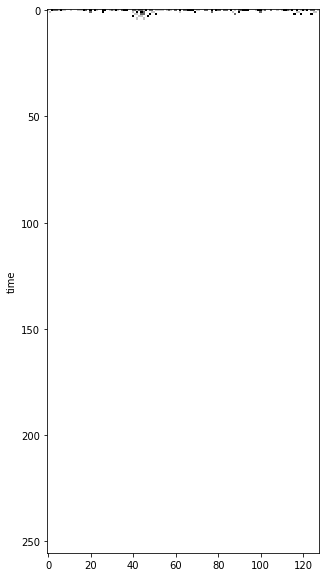

In [ ]:
# for prepare the rule, we can used the function random_rule_table, and provide lambda, k, r
# param isotropic: if True, all planar rotations of a neighbourhood state will map to the same cell state
lambda_val = 0.2

rule_table, actual_lambda, quiescent_state = cpl.random_rule_table(lambda_val=lambda_val, k=4, r=2,
                                                                   quiescent_state=0,
                                                                   isotropic=True)

cellular_automaton = cpl.init_random(128, k=4)

# use the built-in table_rule to use the generated rule table
cellular_automaton = cpl.evolve(cellular_automaton, timesteps=256,
                                apply_rule=lambda n, c, t: cpl.table_rule(n, rule_table), r=2)
plt.figure(figsize=(10, 10))
cpl.plot(cellular_automaton)

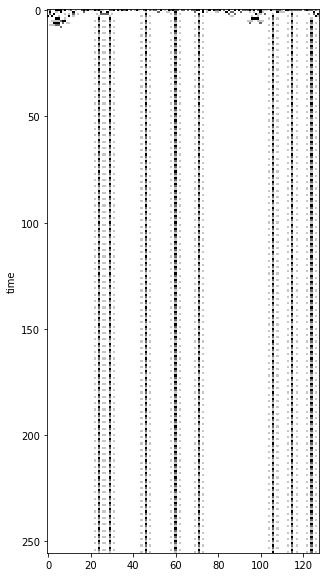

In [ ]:
lambda_val = 0.3

rule_table, actual_lambda, quiescent_state = cpl.random_rule_table(lambda_val=lambda_val, k=4, r=2,
                                                                   quiescent_state=0,
                                                                   isotropic=True)

cellular_automaton = cpl.init_random(128, k=4)

# use the built-in table_rule to use the generated rule table
cellular_automaton = cpl.evolve(cellular_automaton, timesteps=256,
                                apply_rule=lambda n, c, t: cpl.table_rule(n, rule_table), r=2)
plt.figure(figsize=(10, 10))
cpl.plot(cellular_automaton)

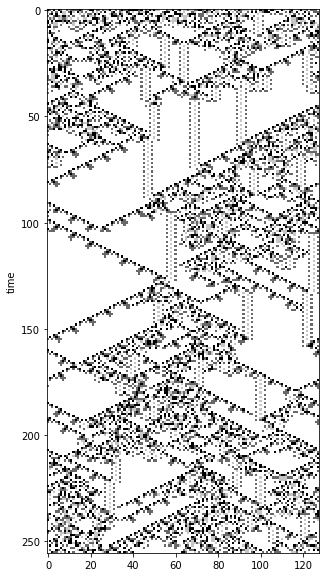

In [ ]:
lambda_val = 0.5

rule_table, actual_lambda, quiescent_state = cpl.random_rule_table(lambda_val=lambda_val, k=4, r=2,
                                                                   quiescent_state=0,
                                                                   isotropic=True)

cellular_automaton = cpl.init_random(128, k=4)

# use the built-in table_rule to use the generated rule table
cellular_automaton = cpl.evolve(cellular_automaton, timesteps=256,
                                apply_rule=lambda n, c, t: cpl.table_rule(n, rule_table), r=2)
plt.figure(figsize=(10, 10))
cpl.plot(cellular_automaton)

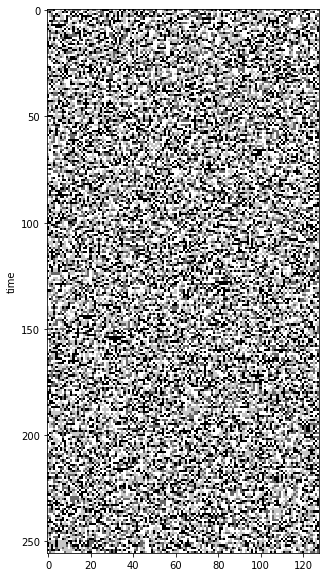

In [ ]:
lambda_val = 0.7

rule_table, actual_lambda, quiescent_state = cpl.random_rule_table(lambda_val=lambda_val, k=4, r=2,
                                                                   quiescent_state=0,
                                                                   isotropic=True)

cellular_automaton = cpl.init_random(128, k=4)

# use the built-in table_rule to use the generated rule table
cellular_automaton = cpl.evolve(cellular_automaton, timesteps=256,
                                apply_rule=lambda n, c, t: cpl.table_rule(n, rule_table), r=2)
plt.figure(figsize=(10, 10))
cpl.plot(cellular_automaton)

> Note: It's possible you get a very different result with me when you run the above cells, as the rule is totally random

Using such a parameter $\lambda$, Longton can generate rules at different classes. He found there is a critical $\lambda$ that when $\lambda < 
\lambda_c$, the system is an ordered system (Class I and Class II), when $\lambda > \lambda_c$, the system is a disordered system (Class IV). And Class III is just the critical point, which is the border between ordered and disordered, so-called the edge of chaos.

|![different classes](https://github.com/AlexMa123/BIU-ComplexSystem/raw/main/figures/phase_transition.png)|
|---------|
|The class 4 is the edge between class 2 and class 3, also called the edge of chaos|

So if we can quantify the complexity for a given $\lambda$, theoretically, it should looks like this:
![complexity](https://github.com/AlexMa123/BIU-ComplexSystem/raw/main/figures/measure_of_complexity.png)

## Questions remain:
1. Why does the system prefer to stay on the edge of chaos, even though most of the rules are not ?

2. Can we define a measure to quantify complexity?

# Exercise

1. Please figure out the local rule for Rule 30, and fill out the form below:




|current state| new state for the center cell|
| ----------- | ---------------------------- |
|    111      |                             |
|    110      |                             |
|    101      |                             |
|    100      |                             |
|    011      |                             |
|    010      |                             |
|    001      |                             |
|    000      |                             |


2. Please figure out which class it is for 
Rule 54, Rule 90, Rule 108, Rule 128 and Rule 182.

For checking this, instead of using the initialization that only puts one cell in the center, please use a random initialization, which means each site has a 50% probability of having a cell.

***Please fill out the form after you figure out the anwsers.***

|Rule number| Class|
|-----------|------|
|54         |      |
|90         |      |
|108        |      |
|128        |      |
|182        |      |

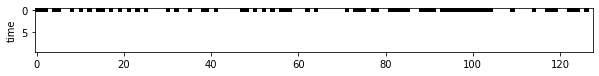

In [ ]:
# An example of random initialization
# Note: You DO NOT need to choose the same timesteps with me.
cellular_automaton = cpl.init_random(128)

cellular_automaton = cpl.evolve(cellular_automaton, 
                                timesteps=10, 
                                memoize=True, 
                                apply_rule=lambda n, c, t: cpl.nks_rule(n, 0))

plt.figure(figsize=(10, 10))
cpl.plot(cellular_automaton)

3. (An open question) As we discussed during the course, there is a phase transition when we change the parameter $\lambda$. Could you please provide a measurement from statistical mechanics that can be used as an order parameter? And also explain why. (No programming is required)